In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [2]:
# import dataset and shuffle data
df = pd.read_csv('dataset.csv')
df = df.sample(frac=1).reset_index(drop=True)
df


,1 x 1,1 x 2,1 x 3,1 x 4,1 x 5,1 x 6,1 x 7,1 x 8,1 x 9,1 x 10,...,64 x 25,64 x 26,64 x 27,64 x 28,64 x 29,64 x 30,64 x 31,64 x 32,Subject,Position
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11,1.0
2,2.464241,7.190761,17.122601,29.829328,40.600669,47.399893,51.923802,56.240701,60.825567,65.060701,...,48.151638,45.498392,44.185109,42.365099,37.588771,28.300999,16.852507,8.953102,5,2.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0
4,4.013790,11.782561,28.241054,49.486141,67.444355,78.178719,84.611122,91.404222,100.577064,110.229725,...,45.069402,44.503492,43.704588,41.908491,37.147335,27.927205,16.591352,8.790708,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,3.833025,11.087408,25.969262,43.821611,56.335106,60.176252,58.739030,56.047413,53.591007,51.463100,...,90.391179,96.715456,90.414868,74.180238,54.358420,34.894584,18.690346,9.325009,4,0.0
682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11,0.0
683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,0.0
684,2.759674,8.191925,19.891585,35.342272,48.652560,56.286839,59.694458,62.276920,66.322201,72.327798,...,44.265670,44.093772,43.433617,41.547426,36.611436,27.355656,16.177259,8.545907,0,0.0


In [3]:
# Split dataset in train and test
num_col = len(df.columns)
train_split = 500

train_data = df.iloc[0:train_split, 0:num_col-2]
test_data = df.iloc[train_split:, 0:num_col-2]

train_labels_subject = df.iloc[0:train_split, num_col-2:num_col-1]
test_labels_subject = df.iloc[train_split:, num_col-2:num_col-1]
train_labels_position = df.iloc[0:train_split, num_col-1:num_col]
test_labels_position = df.iloc[train_split:, num_col-1:num_col]


In [4]:
tf_train_subject = tf.data.Dataset.from_tensor_slices((train_data.values, train_labels_subject.values))
tf_test_subject = tf.data.Dataset.from_tensor_slices((test_data.values, test_labels_subject.values))

print(tf_train_subject)
print(tf_test_subject)

tf_train_position = tf.data.Dataset.from_tensor_slices((train_data.values, train_labels_position.values))
tf_test_position = tf.data.Dataset.from_tensor_slices((test_data.values, test_labels_position.values))

print(tf_train_position)
print(tf_test_position)


<TensorSliceDataset shapes: ((2048,), (1,)), types: (tf.float64, tf.int64)>
<TensorSliceDataset shapes: ((2048,), (1,)), types: (tf.float64, tf.int64)>
<TensorSliceDataset shapes: ((2048,), (1,)), types: (tf.float64, tf.float64)>
<TensorSliceDataset shapes: ((2048,), (1,)), types: (tf.float64, tf.float64)>


/usr/local/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


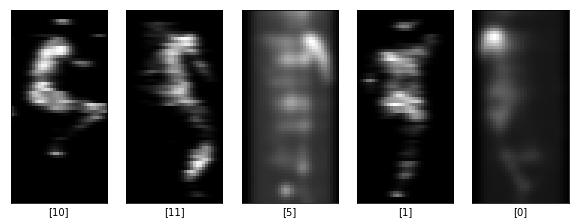

In [5]:
plt.figure(figsize=(10,5))
i = 0

for pressure_map, label in tf_train_subject.take(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(pressure_map.numpy().reshape((64, 32)), cmap='gray')
    plt.xlabel(label.numpy())
    
    # TODO: add labelalso for position
    
    i = i + 1


In [6]:
def preprocess_map(pressure_map, label):
    pressure_map = tf.reshape(pressure_map, [64, 32, 1])
    #pressure_map = tf.cast(pressure_map, tf.float32) / 255.
    
    return pressure_map, label

tf_train_subject = tf_train_subject.map(preprocess_map, num_parallel_calls=tf.data.experimental.AUTOTUNE)
tf_test_subject = tf_test_subject.map(preprocess_map, num_parallel_calls=tf.data.experimental.AUTOTUNE)

print(tf_train_subject)
print(tf_test_subject)

tf_train_position = tf_train_position.map(preprocess_map, num_parallel_calls=tf.data.experimental.AUTOTUNE)
tf_test_position = tf_test_position.map(preprocess_map, num_parallel_calls=tf.data.experimental.AUTOTUNE)

print(tf_train_position)
print(tf_test_position)

<ParallelMapDataset shapes: ((64, 32, 1), (1,)), types: (tf.float64, tf.int64)>
<ParallelMapDataset shapes: ((64, 32, 1), (1,)), types: (tf.float64, tf.int64)>
<ParallelMapDataset shapes: ((64, 32, 1), (1,)), types: (tf.float64, tf.float64)>
<ParallelMapDataset shapes: ((64, 32, 1), (1,)), types: (tf.float64, tf.float64)>


In [7]:
def pipeline(tf_data):
    tf_data = tf_data.shuffle(100)
    tf_data = tf_data.batch(32)
    tf_data = tf_data.prefetch(tf.data.experimental.AUTOTUNE)
    
    return tf_data

tf_train_subject = pipeline(tf_train_subject)
tf_test_subject = pipeline(tf_test_subject)

print(tf_train_subject)
print(tf_test_subject)

tf_train_position = pipeline(tf_train_position)
tf_test_position = pipeline(tf_test_position)

print(tf_train_position)
print(tf_test_position)


<PrefetchDataset shapes: ((None, 64, 32, 1), (None, 1)), types: (tf.float64, tf.int64)>
<PrefetchDataset shapes: ((None, 64, 32, 1), (None, 1)), types: (tf.float64, tf.int64)>
<PrefetchDataset shapes: ((None, 64, 32, 1), (None, 1)), types: (tf.float64, tf.float64)>
<PrefetchDataset shapes: ((None, 64, 32, 1), (None, 1)), types: (tf.float64, tf.float64)>


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5, 5), activation='relu', padding='same', input_shape=(64, 32, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    
    tf.keras.layers.Dense(14, activation='softmax'),
])

In [9]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 32, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 12, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 6, 16)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1344)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               161400    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [10]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=2, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1),
]

In [11]:
train_log = model.fit(tf_train_subject, validation_data=tf_test_subject, epochs=10, callbacks = callbacks)


Train for 16 steps, validate for 6 steps
Epoch 1/10
16/16 [==============================] - 1s 63ms/step - loss: 9.0766 - accuracy: 0.0980 - val_loss: 3.7057 - val_accuracy: 0.1505
Epoch 2/10
16/16 [==============================] - 1s 36ms/step - loss: 2.7610 - accuracy: 0.1800 - val_loss: 2.7731 - val_accuracy: 0.1452
Epoch 3/10
16/16 [==============================] - 1s 35ms/step - loss: 2.1094 - accuracy: 0.2680 - val_loss: 2.5640 - val_accuracy: 0.1828
Epoch 4/10
16/16 [==============================] - 1s 35ms/step - loss: 1.7019 - accuracy: 0.3840 - val_loss: 2.5398 - val_accuracy: 0.1828
Epoch 5/10
16/16 [==============================] - 1s 35ms/step - loss: 1.3882 - accuracy: 0.5420 - val_loss: 2.5557 - val_accuracy: 0.1989
Epoch 6/10
16/16 [==============================] - 1s 36ms/step - loss: 1.1517 - accuracy: 0.6240 - val_loss: 2.6022 - val_accuracy: 0.2312
Epoch 7/10
16/16 [==============================] - 1s 36ms/step - loss: 0.9567 - accuracy: 0.6960 - val_loss: 2.

Training accuracy: 0.826000
Validation accuracy: 0.338710


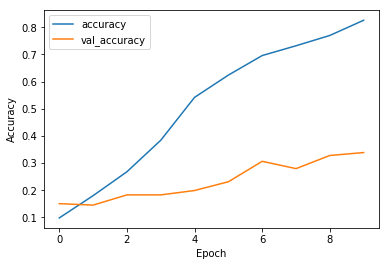

In [12]:
plt.plot(train_log.history['accuracy'], label='accuracy')
plt.plot(train_log.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

print('Training accuracy: %f' % train_log.history['accuracy'][-1])
print('Validation accuracy: %f' % train_log.history['val_accuracy'][-1])

In [15]:
predictions = model.predict(tf_test_subject)
predictions = np.argmax(predictions, axis=1)

In [22]:
plt.figure(figsize=(10,5))


for i, row in test_data.head(15).iterrows():
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(row.values.reshape((64, 32)), cmap='gray')
    plt.xlabel(predictions[i])
    

ValueError: num must be 1 <= num <= 15, not 501

<Figure size 720x360 with 0 Axes>